In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile 
from PIL import Image,ImageOps

In [ ]:
zip = zipfile.ZipFile('bee_imgs.zip')
zip.extractall()

In [51]:
df=pd.read_csv("bee_data.csv")
df=df.dropna(how='any')
df['species']=df['subspecies']
df=df.drop(columns=['date','time','zip code','location','caste','subspecies'])
df

,file,health,pollen_carrying,species
0,041_066.png,hive being robbed,False,-1
1,041_072.png,hive being robbed,False,-1
2,041_073.png,hive being robbed,False,-1
3,041_067.png,hive being robbed,False,-1
4,041_059.png,hive being robbed,False,-1
...,...,...,...,...
5167,027_011.png,healthy,True,-1
5168,027_007.png,healthy,True,-1
5169,027_013.png,healthy,False,-1
5170,027_012.png,healthy,False,-1


In [52]:
df['species'].unique()

array(['-1', 'Italian honey bee', 'VSH Italian honey bee',
       'Carniolan honey bee', 'Russian honey bee',
       '1 Mixed local stock 2', 'Western honey bee'], dtype=object)

In [53]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le1=LabelEncoder()
df['health']=le.fit_transform(df['health'])
df['pollen_carrying']=le.fit_transform(df['pollen_carrying'])
df['species']=le1.fit_transform(df['species'])

In [54]:
df

,file,health,pollen_carrying,species
0,041_066.png,4,0,0
1,041_072.png,4,0,0
2,041_073.png,4,0,0
3,041_067.png,4,0,0
4,041_059.png,4,0,0
...,...,...,...,...
5167,027_011.png,3,1,0
5168,027_007.png,3,1,0
5169,027_013.png,3,0,0
5170,027_012.png,3,0,0


In [145]:
import os
cur_path = os.getcwd()
print(cur_path)

/content


In [146]:
path = os.path.join(cur_path,'bee_imgs/')
images = os.listdir(path)

In [147]:
print(images)

['030_311.png', '005_258.png', '014_002.png', '023_006.png', '010_384.png', '005_376.png', '040_297.png', '032_689.png', '016_294.png', '004_049.png', '032_693.png', '019_282.png', '005_414.png', '038_007.png', '030_847.png', '032_316.png', '043_062.png', '011_022.png', '001_156.png', '038_256.png', '008_251.png', '030_700.png', '046_053.png', '016_167.png', '015_869.png', '032_828.png', '019_1235.png', '030_571.png', '032_298.png', '017_078.png', '015_1226.png', '030_520.png', '031_029.png', '022_110.png', '010_824.png', '019_321.png', '030_549.png', '015_400.png', '032_923.png', '023_007.png', '022_064.png', '039_016.png', '032_619.png', '032_771.png', '025_015.png', '015_672.png', '030_166.png', '040_284.png', '016_251.png', '040_047.png', '038_201.png', '046_159.png', '016_240.png', '010_409.png', '010_635.png', '003_281.png', '039_004.png', '041_032.png', '040_501.png', '022_217.png', '015_1108.png', '041_033.png', '040_487.png', '032_503.png', '040_525.png', '015_810.png', '005_4

In [151]:
f=['.DS_Store']
for i in images:
  if i in f:
    images.remove(i)

In [152]:
len(images)

5172

In [153]:
print(list(set(images)))

['038_123.png', '030_703.png', '040_447.png', '016_176.png', '022_103.png', '030_617.png', '040_555.png', '016_210.png', '038_436.png', '046_023.png', '015_1146.png', '022_334.png', '015_983.png', '004_382.png', '043_006.png', '015_338.png', '040_241.png', '003_265.png', '022_102.png', '032_725.png', '015_472.png', '004_207.png', '004_398.png', '032_477.png', '040_267.png', '010_435.png', '015_1172.png', '019_450.png', '030_784.png', '030_658.png', '008_081.png', '030_403.png', '046_130.png', '038_341.png', '022_431.png', '015_1124.png', '004_239.png', '040_304.png', '010_395.png', '030_477.png', '015_1198.png', '017_038.png', '030_461.png', '015_1131.png', '030_573.png', '040_022.png', '021_239.png', '016_171.png', '040_165.png', '003_191.png', '040_173.png', '024_012.png', '038_441.png', '032_810.png', '019_1328.png', '003_135.png', '016_138.png', '030_202.png', '030_158.png', '040_424.png', '019_712.png', '032_837.png', '010_524.png', '001_085.png', '019_1172.png', '038_357.png', '0

In [154]:
len(images)

5172

In [155]:
data = []
labels = []

In [156]:
print(len(df))

5172


In [157]:
for i in range(len(df)):
  #print(df['file'][i])
  if df['file'][i] in images:
    imag = Image.open(path+ '//'+ df['file'][i])
    imag=ImageOps.grayscale(imag)
    imag = imag.resize((64,64))
    imag = np.array(imag)
    data.append(imag)
    labels.append(df['species'][i])
  else:
    print("error no images")

In [158]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

In [159]:
len(labels)

5172

In [160]:
print(data)

[array([[224, 225, 219, ..., 241, 242, 241],
       [225, 227, 228, ..., 241, 241, 240],
       [227, 232, 233, ..., 241, 241, 240],
       ...,
       [118, 122, 111, ..., 184, 164, 158],
       [125, 121,  97, ..., 206, 175, 167],
       [125, 119,  92, ..., 222, 181, 175]], dtype=uint8), array([[233, 233, 233, ..., 222, 222, 218],
       [231, 231, 231, ..., 217, 216, 212],
       [227, 227, 227, ..., 209, 206, 203],
       ...,
       [ 72,  71,  70, ..., 123, 128, 132],
       [ 71,  70,  68, ..., 124, 128, 130],
       [ 67,  66,  65, ..., 123, 127, 127]], dtype=uint8), array([[249, 249, 249, ..., 249, 249, 249],
       [249, 249, 249, ..., 249, 249, 249],
       [249, 249, 249, ..., 249, 249, 249],
       ...,
       [244, 244, 242, ..., 182, 184, 185],
       [244, 243, 242, ..., 182, 185, 186],
       [244, 242, 242, ..., 184, 187, 189]], dtype=uint8), array([[240, 240, 240, ..., 242, 242, 242],
       [241, 241, 241, ..., 242, 242, 242],
       [241, 241, 242, ..., 242, 242, 

In [161]:
len(data)

5172

In [162]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [163]:
print(data.shape, labels.shape)

(5172, 64, 64) (5172,)


In [164]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [167]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

In [168]:
Img=64
#Converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train,7)
y_test = tf.keras.utils.to_categorical(y_test,7)
X_train=np.array(X_train).reshape(-1,Img,Img,1)
X_test=np.array(X_test).reshape(-1,Img,Img,1)

In [169]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(7, activation='softmax'))
print("Initialized model")

Initialized model


In [170]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [177]:
history = model.fit(X_train, y_train, batch_size=120, epochs=12, validation_data=(X_test, y_test))
model.save("bees.h5")

Epoch 1/12
33/33 [==============================] - 206s 6s/step - loss: 0.1913 - accuracy: 0.9273 - val_loss: 0.6575 - val_accuracy: 0.8213
Epoch 2/12
33/33 [==============================] - 205s 6s/step - loss: 0.1646 - accuracy: 0.9441 - val_loss: 0.7987 - val_accuracy: 0.8028
Epoch 3/12
33/33 [==============================] - 206s 6s/step - loss: 0.1394 - accuracy: 0.9495 - val_loss: 0.7749 - val_accuracy: 0.8198
Epoch 4/12
33/33 [==============================] - 205s 6s/step - loss: 0.1235 - accuracy: 0.9551 - val_loss: 0.8369 - val_accuracy: 0.8190
Epoch 5/12
33/33 [==============================] - 204s 6s/step - loss: 0.1365 - accuracy: 0.9536 - val_loss: 0.7215 - val_accuracy: 0.8105
Epoch 6/12
33/33 [==============================] - 204s 6s/step - loss: 0.1148 - accuracy: 0.9606 - val_loss: 0.7438 - val_accuracy: 0.8229
Epoch 7/12
33/33 [==============================] - 204s 6s/step - loss: 0.1139 - accuracy: 0.9588 - val_loss: 0.7525 - val_accuracy: 0.8167
Epoch 8/12
33

Saved Model & Graph to disk


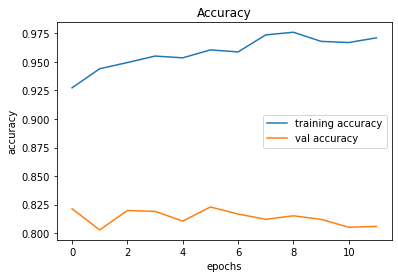

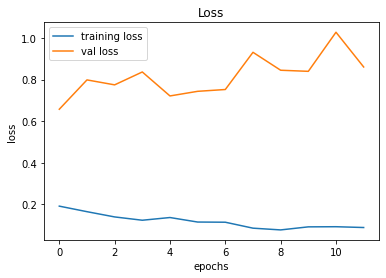

In [178]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.savefig('Accuracy.png')

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.savefig('Loss.png')
print("Saved Model & Graph to disk")

In [183]:
model = tf.keras.models.load_model('bees.h5')
print("Loaded model from disk")


Loaded model from disk


In [186]:
res = model.predict(X_test)
res=np.round(res)
np.set_printoptions(precision=2)
print(res)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [187]:
from sklearn.metrics import accuracy_score
print("Accuracy Score for the algorithm=>{}%".format(round(accuracy_score(y_test,res)*100),2))

Accuracy Score for the algorithm=>80%
